# Proyek Analisis Data: Guanyuan's Air Quality
- **Nama:** Muhammad Ilham Aji Firmansyah
- **Email:** ilhamaji2001@gmail.com
- **ID Dicoding:** ilhamaji

## Menentukan Pertanyaan Bisnis

- What is the trend of PM2.5 concentration in Guanyuan from 2013 to 2017?
- Is there a relationship between temperature (TEMP) and the concentration of pollutants such as PM2.5, SO2, or CO in Guanyuan?
- How do wind patterns (wd and WSPM) influence the distribution of PM2.5 in Guanyuan?
- Do concentrations of certain pollutants (such as NO2 or O3) change during specific seasons or months?
- How does rainfall (RAIN) affect air pollution levels in Guanyuan?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [ ]:
# Load the dataset from the provided URL into a DataFrame
file_path = "https://raw.githubusercontent.com/Syzst/project-aqi-dicoding-datascience/refs/heads/main/Data/PRSA_Data_20130301-20170228/PRSA_Data_Guanyuan_20130301-20170228.csv"
guanyuan_df = pd.read_csv(file_path)

**Insight:**
- xxx
- xxx

### Assessing Data

In [ ]:
 # Perform initial assessment by viewing the first few rows of the DataFrame
initial_assessment = guanyuan_df.head()

# Get an overview of the DataFrame structure, including data types and non-null values
initial_info = guanyuan_df.info()

# Generate summary statistics for the numerical columns in the DataFrame
initial_describe = guanyuan_df.describe()

# Display the results of the initial assessment, info, and descriptive statistics
initial_assessment, initial_info, initial_describe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34448 non-null  float64
 6   PM10     34635 non-null  float64
 7   SO2      34590 non-null  float64
 8   NO2      34405 non-null  float64
 9   CO       33311 non-null  float64
 10  O3       33891 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


(   No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
 0   1  2013      3    1     0    4.0   4.0  14.0  20.0  300.0  69.0  -0.7   
 1   2  2013      3    1     1    4.0   4.0  13.0  17.0  300.0  72.0  -1.1   
 2   3  2013      3    1     2    3.0   3.0  10.0  19.0  300.0  69.0  -1.1   
 3   4  2013      3    1     3    3.0   6.0   7.0  24.0  400.0  62.0  -1.4   
 4   5  2013      3    1     4    3.0   6.0   5.0  14.0  400.0  71.0  -2.0   
 
      PRES  DEWP  RAIN   wd  WSPM   station  
 0  1023.0 -18.8   0.0  NNW   4.4  Guanyuan  
 1  1023.2 -18.2   0.0    N   4.7  Guanyuan  
 2  1023.5 -18.2   0.0  NNW   5.6  Guanyuan  
 3  1024.5 -19.4   0.0   NW   3.1  Guanyuan  
 4  1025.2 -19.5   0.0    N   2.0  Guanyuan  ,
 None,
                  No          year         month           day          hour  \
 count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
 mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
 std  

In [ ]:
# Calculate the total number of missing values in each column
missing_sum = guanyuan_df.isnull().sum()

# Calculate the percentage of missing values in each column
missing_percentage = guanyuan_df.isnull().mean() * 100

# Display the total missing values and their corresponding percentages
missing_sum, missing_percentage

(No            0
 year          0
 month         0
 day           0
 hour          0
 PM2.5       616
 PM10        429
 SO2         474
 NO2         659
 CO         1753
 O3         1173
 TEMP         20
 PRES         20
 DEWP         20
 RAIN         20
 wd           81
 WSPM         14
 station       0
 dtype: int64,
 No         0.000000
 year       0.000000
 month      0.000000
 day        0.000000
 hour       0.000000
 PM2.5      1.756788
 PM10       1.223477
 SO2        1.351814
 NO2        1.879420
 CO         4.999430
 O3         3.345311
 TEMP       0.057039
 PRES       0.057039
 DEWP       0.057039
 RAIN       0.057039
 wd         0.231006
 WSPM       0.039927
 station    0.000000
 dtype: float64)

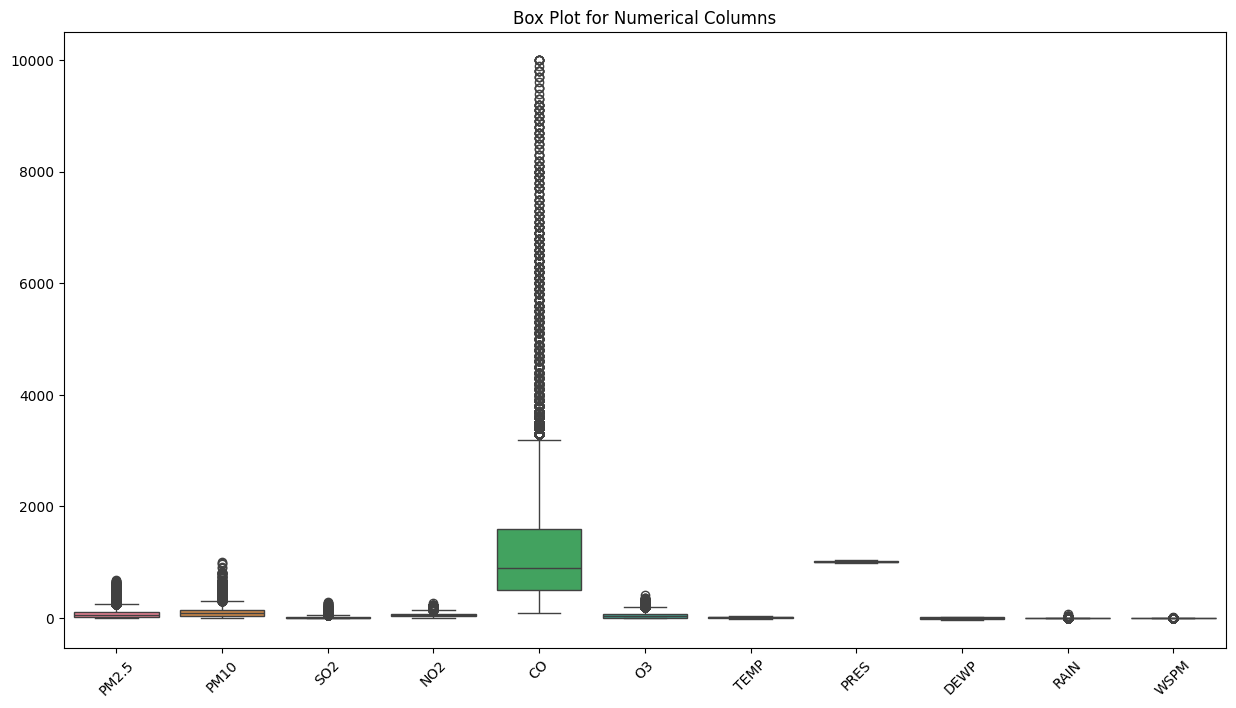

In [ ]:
# Checking outliers
# Plot boxplots for the relevant columns
plt.figure(figsize=(15, 8))
sns.boxplot(data=guanyuan_df[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']])
plt.xticks(rotation=45)
plt.title('Box Plot for Numerical Columns')
plt.show()

**Insight:**
- there are some columns that contain missing value
- xxx

### Cleaning Data

In [ ]:
# Interpolating missing values for columns with less than 5% missing data
guanyuan_df['PM2.5'] = guanyuan_df['PM2.5'].interpolate(method='linear')
guanyuan_df['PM10'] = guanyuan_df['PM10'].interpolate(method='linear')
guanyuan_df['SO2'] = guanyuan_df['SO2'].interpolate(method='linear')
guanyuan_df['NO2'] = guanyuan_df['NO2'].interpolate(method='linear')
guanyuan_df['CO'] = guanyuan_df['CO'].interpolate(method='linear')  # ~5% missing
guanyuan_df['O3'] = guanyuan_df['O3'].interpolate(method='linear')  # ~3% missing

# Filling wind direction (categorical) with the mode
guanyuan_df['wd'].fillna(guanyuan_df['wd'].mode()[0], inplace=True)

# Filling remaining missing values with mean
guanyuan_df['TEMP'].fillna(guanyuan_df['TEMP'].mean(), inplace=True)
guanyuan_df['PRES'].fillna(guanyuan_df['PRES'].mean(), inplace=True)
guanyuan_df['DEWP'].fillna(guanyuan_df['DEWP'].mean(), inplace=True)
guanyuan_df['RAIN'].fillna(guanyuan_df['RAIN'].mean(), inplace=True)
guanyuan_df['WSPM'].fillna(guanyuan_df['WSPM'].mean(), inplace=True)

# Checking missing values after filling the columns
missing_sum_after = guanyuan_df.isnull().sum()
print(missing_sum_after)

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64


<ipython-input-6-beac3ffaca96>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  guanyuan_df['wd'].fillna(guanyuan_df['wd'].mode()[0], inplace=True)
<ipython-input-6-beac3ffaca96>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpla

In [ ]:
# Combine 'year', 'month', 'day', and 'hour' columns into a single 'date' column
# First, convert each part to a string, then concatenate them into a proper date-time format
# Finally, convert the concatenated string to a datetime object
guanyuan_df['date'] = pd.to_datetime(guanyuan_df['year'].astype(str) + '-' +
                            guanyuan_df['month'].astype(str) + '-' +
                            guanyuan_df['day'].astype(str) + ' ' +
                            guanyuan_df['hour'].astype(str) + ':00')

In [ ]:
# Checking df statistics
guanyuan_df.describe()
guanyuan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 19 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   No       35064 non-null  int64         
 1   year     35064 non-null  int64         
 2   month    35064 non-null  int64         
 3   day      35064 non-null  int64         
 4   hour     35064 non-null  int64         
 5   PM2.5    35064 non-null  float64       
 6   PM10     35064 non-null  float64       
 7   SO2      35064 non-null  float64       
 8   NO2      35064 non-null  float64       
 9   CO       35064 non-null  float64       
 10  O3       35064 non-null  float64       
 11  TEMP     35064 non-null  float64       
 12  PRES     35064 non-null  float64       
 13  DEWP     35064 non-null  float64       
 14  RAIN     35064 non-null  float64       
 15  wd       35064 non-null  object        
 16  WSPM     35064 non-null  float64       
 17  station  35064 non-null  object

In [ ]:
guanyuan_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,date
0,1,2013,3,1,0,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Guanyuan,2013-03-01 00:00:00
1,2,2013,3,1,1,4.0,4.0,13.0,17.0,300.0,72.0,-1.1,1023.2,-18.2,0.0,N,4.7,Guanyuan,2013-03-01 01:00:00
2,3,2013,3,1,2,3.0,3.0,10.0,19.0,300.0,69.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Guanyuan,2013-03-01 02:00:00
3,4,2013,3,1,3,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Guanyuan,2013-03-01 03:00:00
4,5,2013,3,1,4,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5,0.0,N,2.0,Guanyuan,2013-03-01 04:00:00


## Exploratory Data Analysis (EDA)

### Explore ...

In [ ]:
correlation_matrix = guanyuan_df[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']].corr()
correlation_matrix

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
PM2.5,1.000000,0.886022,0.494901,0.688364,0.786156,-0.147852,-0.132281,-0.000192,0.120898,-0.010611,-0.284220
PM10,0.886022,1.000000,0.465970,0.649267,0.700194,-0.107093,-0.090089,-0.050201,0.081822,-0.025486,-0.184701
SO2,0.494901,0.465970,1.000000,0.521432,0.551996,-0.187212,-0.360145,0.211648,-0.270334,-0.039849,-0.139031
NO2,0.688364,0.649267,0.521432,1.000000,0.718719,-0.508825,-0.322036,0.148463,-0.049317,-0.046683,-0.453776
CO,0.786156,0.700194,0.551996,0.718719,1.000000,-0.300855,-0.302406,0.153061,-0.035507,-0.011127,-0.302116
O3,-0.147852,-0.107093,-0.187212,-0.508825,-0.300855,1.000000,0.612910,-0.461201,0.342337,0.023393,0.306719
TEMP,-0.132281,-0.090089,-0.360145,-0.322036,-0.302406,0.612910,1.000000,-0.827133,0.823099,0.036601,0.037907
PRES,-0.000192,-0.050201,0.211648,0.148463,0.153061,-0.461201,-0.827133,1.000000,-0.776384,-0.060403,0.071310
DEWP,0.120898,0.081822,-0.270334,-0.049317,-0.035507,0.342337,0.823099,-0.776384,1.000000,0.080789,-0.305011
RAIN,-0.010611,-0.025486,-0.039849,-0.046683,-0.011127,0.023393,0.036601,-0.060403,0.080789,1.000000,0.022471


**Insight:**
- PM2.5, CO, and NO2 are strongly correlated, implying similar sources or behaviors in the atmosphere.
- Temperature inversely affects the concentration of most pollutants except for O3, which tends to increase with higher temperatures.
- Wind speed plays an essential role in reducing concentrations of most pollutants, highlighting its significance in air quality improvement.
- Rainfall and pressure show weak relationships with pollutant levels, indicating less influence on air quality compared to temperature and wind speed.

## Visualization & Explanatory Analysis

### Pertanyaan 1: What is the trend of PM2.5 concentration in Guanyuan from 2013 to 2017?

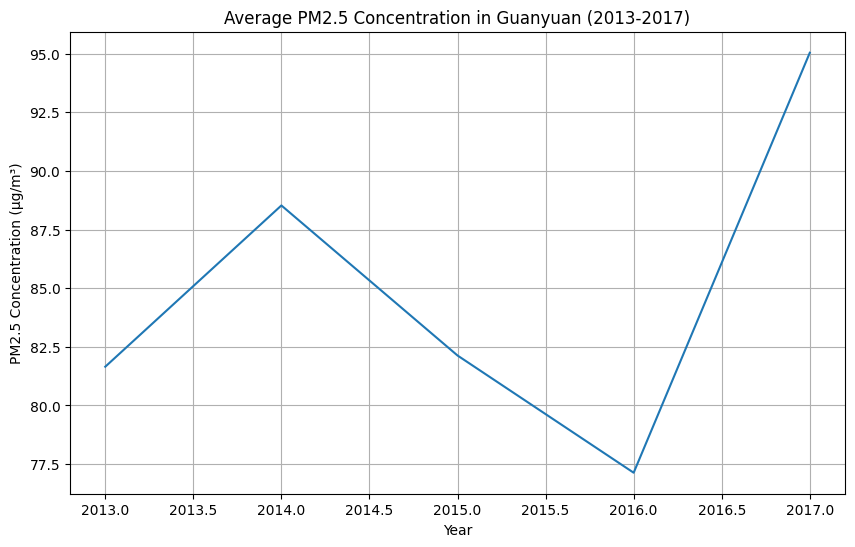

In [ ]:
# 1. Trend of PM2.5 concentration in Guanyuan from 2013 to 2017
plt.figure(figsize=(10, 6))
guanyuan_df.groupby(guanyuan_df['date'].dt.year)['PM2.5'].mean().plot()
plt.title('Average PM2.5 Concentration in Guanyuan (2013-2017)')
plt.xlabel('Year')
plt.ylabel('PM2.5 Concentration (µg/m³)')
plt.grid(True)
plt.show()

**Insights**

**2013-2014:**

- The average PM2.5 concentration increases from around 82.5 µg/m³ in 2013 to approximately 88.5 µg/m³ in 2014. This indicates a worsening of air quality during this period.

**2014-2016:**

- From 2014 to 2016, there is a sharp decline in PM2.5 levels. By 2016, the concentration reaches a low of approximately 79 µg/m³, suggesting an improvement in air quality over these two years.

**2016-2017:**

- The PM2.5 concentration rises again sharply in 2017, peaking at around 95 µg/m³, indicating a return to poorer air quality in this year.

**Interpretation:**
The trend shows fluctuations in PM2.5 concentration, with worsening air quality from 2013 to 2014, followed by a period of improvement from 2014 to 2016. However, air quality deteriorates again in 2017, reaching the highest average concentration over the 5-year period.
These fluctuations could be linked to various factors, such as changes in emissions, weather patterns, or pollution control measures during these years.

### Pertanyaan 2: Is there a relationship between temperature (TEMP) and the concentration of pollutants in Guanyuan?

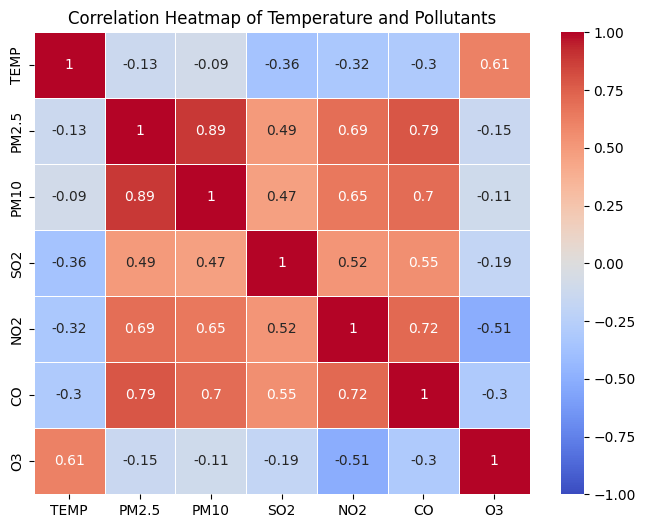

In [ ]:
# Correlation matrix of TEMP and the selected pollutants
corr_matrix = guanyuan_df[['TEMP', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Heatmap of Temperature and Pollutants')
plt.show()

**Insights:**
The heatmap illustrates the correlation matrix between temperature (TEMP) and various air pollutants, including PM2.5, PM10, SO2, NO2, CO, and O3. The values range from -1 to 1, where:

- 1 indicates a perfect positive correlation (variables increase together).
- -1 indicates a perfect negative correlation (one variable increases while the other decreases).
- 0 indicates no correlation.

Key Observations:

1. **Temperature (TEMP) Correlations:**

- TEMP vs PM2.5 (-0.13): A weak negative correlation, indicating that as temperature increases, PM2.5 tends to slightly decrease, but the relationship is weak.
- TEMP vs SO2 (-0.36), TEMP vs NO2 (-0.32), and TEMP vs CO (-0.3): Moderate negative correlations, suggesting that higher temperatures are associated with lower concentrations of SO2, NO2, and CO.
- TEMP vs O3 (0.61): A strong positive correlation, meaning that ozone (O3) levels increase with rising temperatures.

2. **Pollutant Correlations:**

- PM2.5 vs PM10 (0.89): A very strong positive correlation, indicating that when PM2.5 increases, PM10 also increases, which makes sense because both are particulate pollutants and often coexist.
- PM2.5 vs NO2 (0.69) and PM2.5 vs CO (0.79): Strong positive correlations, showing that higher concentrations of PM2.5 are associated with higher levels of NO2 and CO, which may come from similar pollution sources, such as traffic emissions.
- NO2 vs CO (0.72): A strong positive correlation, reflecting that these two pollutants are likely emitted from similar sources, like combustion processes.

3. **O3 Correlations:**

- O3 vs NO2 (-0.51), O3 vs SO2 (-0.19), O3 vs PM2.5 (-0.15): Ozone shows negative correlations with these pollutants, particularly with NO2. This is typical because NO2 reacts with sunlight to form ozone, and the depletion of NO2 can correspond to higher ozone levels.

4. **Interpretation:**
Temperature tends to decrease most pollutants, especially NO2, SO2, and CO, but it increases O3 levels significantly.
PM2.5 is closely related to PM10, NO2, and CO, indicating that these pollutants likely share similar sources (e.g., vehicular emissions, industrial processes).
O3 behaves somewhat independently from other pollutants and is more affected by temperature and photochemical reactions.
This correlation matrix helps understand the interactions between different pollutants and environmental conditions in Guanyuan, which can be useful for air quality management and prediction.

### Pertanyaan 3: How do wind patterns (wd and WSPM) influence the distribution of PM2.5 in Guanyuan?

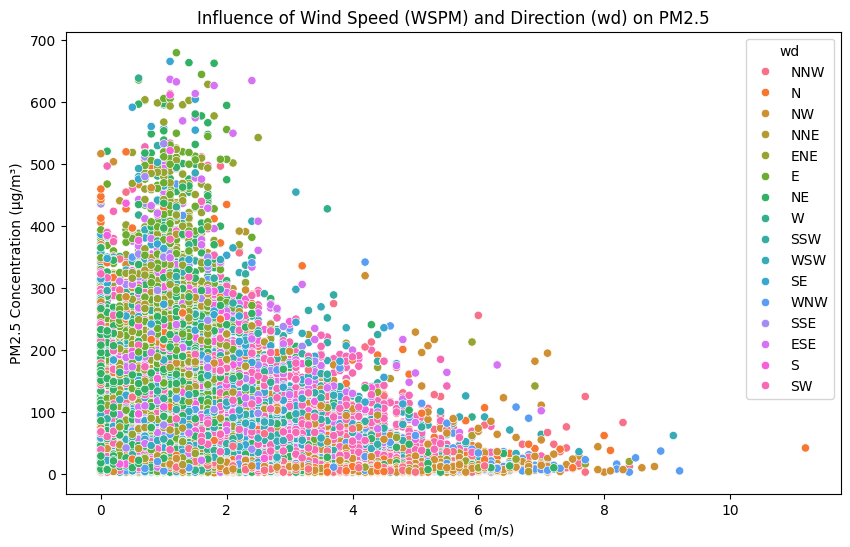

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=guanyuan_df, x='WSPM', y='PM2.5', hue='wd')
plt.title('Influence of Wind Speed (WSPM) and Direction (wd) on PM2.5')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('PM2.5 Concentration (µg/m³)')
plt.show()

**Insights**:
Wind Speed vs PM2.5 Concentration:

Higher concentrations of PM2.5 are observed when the wind speed is lower

1.    Wind Speed vs PM2.5 Concentration:

- Higher concentrations of PM2.5 are observed when the wind speed is lower (around 0 to 3 m/s).
- As the wind speed increases, the concentration of PM2.5 generally decreases, which indicates that higher wind speeds likely help to disperse the PM2.5 pollutants, lowering their concentration.


2.    Wind Direction Influence:

- There doesn't seem to be a strong visual separation of PM2.5 concentration based on the wind direction alone, but there are some directions like ENE, S, and ESE that appear more frequently in the high-concentration, low-wind-speed regions.
- Wind directions like N, NW, and WNW seem to have lower concentrations at higher wind speeds.

**Interpretation**:
Wind Speed appears to be the more dominant factor in reducing PM2.5 concentrations, with higher wind speeds corresponding to lower concentrations.
Wind Direction may still play a role, as certain directions might be more associated with stagnant air or pollution sources, but this effect seems less pronounced compared to the impact of wind speed.


### Pertanyaan 4: Do concentrations of certain pollutants (such as NO2 or O3) change during specific seasons or months?

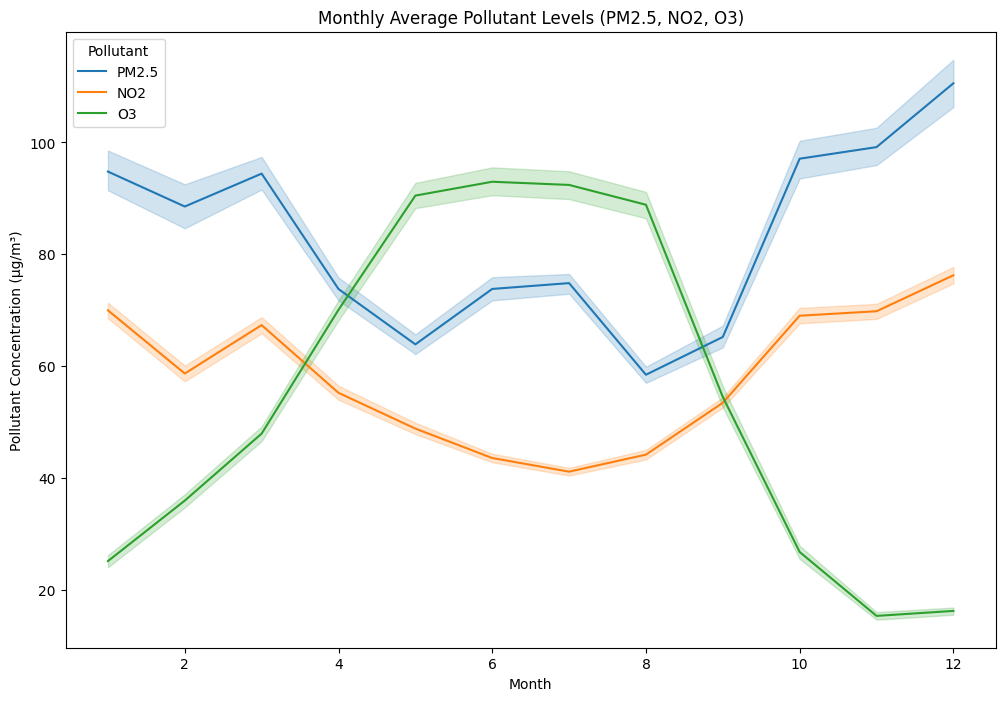

In [ ]:
guanyuan_df['month'] = guanyuan_df['date'].dt.month
pollutants = ['PM2.5', 'NO2', 'O3']

plt.figure(figsize=(12, 8))
for pollutant in pollutants:
    sns.lineplot(x='month', y=pollutant, data=guanyuan_df, label=pollutant)

plt.title('Monthly Average Pollutant Levels (PM2.5, NO2, O3)')
plt.xlabel('Month')
plt.ylabel('Pollutant Concentration (µg/m³)')
plt.legend(title='Pollutant')
plt.show()

**Insights:**
The plot shows a clear seasonal variation in pollutant levels. PM2.5 and NO2 concentrations rise during colder months, while O3 concentrations peak in the warmer months. This variation reflects the different sources and atmospheric processes that influence these pollutants at different times of the year.

### Pertanyaan 5: How does rainfall (RAIN) affect air pollution levels in Guanyuan?

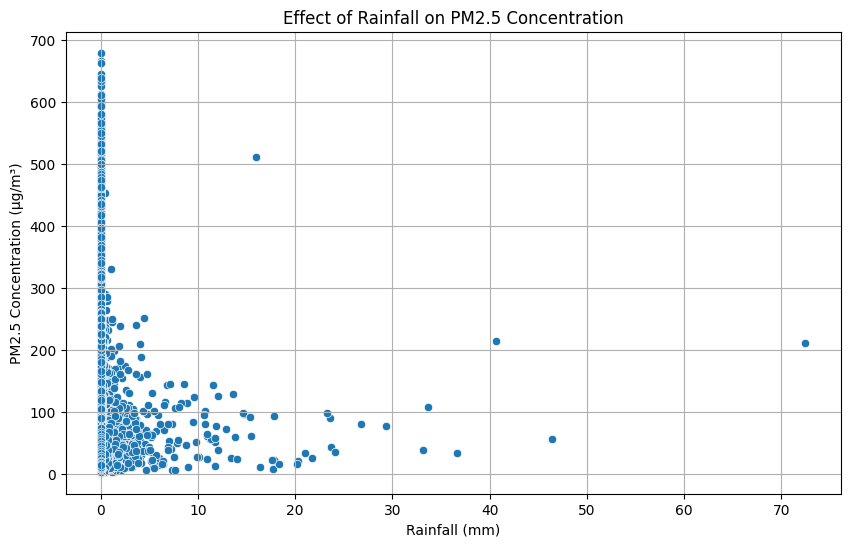

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='RAIN', y='PM2.5', data=guanyuan_df)
plt.title('Effect of Rainfall on PM2.5 Concentration')
plt.xlabel('Rainfall (mm)')
plt.ylabel('PM2.5 Concentration (µg/m³)')
plt.grid(True)
plt.show()

**Insight:**
- **Trend Observation**: The data points indicate that higher PM2.5 concentrations are most commonly associated with low or no rainfall. At the very low levels of rainfall (close to 0 mm), PM2.5 concentrations can vary widely, reaching values as high as 600 µg/m³.

- **Effect of Increasing Rainfall**: As rainfall increases, PM2.5 concentration generally decreases. There are very few instances of high PM2.5 concentrations when rainfall exceeds 20 mm. This suggests that rainfall tends to "clean" the air by removing PM2.5 particles from the atmosphere, leading to lower concentrations.

- **For rainfall above 20 mm, the concentration of PM2.5 is much lower, generally below 100 µg/m³.**

- **PM2.5 concentrations tend to be higher when there's little or no rainfall, and rainfall helps reduce PM2.5 levels in Guanyuan.**

In [ ]:
# Save cleaned DataFrame as a CSV file
guanyuan_df.to_csv('guanyuan_df.csv', index=False)

# Download the CSV file to local machine
from google.colab import files
files.download('guanyuan_df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Conclusion

1. Conclusion of Question 1:
    - The PM2.5 concentration in Guanyuan fluctuated between 2013 and 2017. After a rise in pollution levels from 2013 to 2014, air quality improved steadily until 2016. However, there was a sharp increase in PM2.5 levels in 2017, indicating worsening air quality in that year.

2. Conclusion of Question 2:
    - Higher temperatures tend to reduce concentrations of most pollutants, such as PM2.5, SO2, NO2, and CO, but significantly increase O3 (ozone) levels. PM2.5 is strongly correlated with PM10, NO2, and CO, indicating they likely come from similar sources like traffic or industrial emissions. In contrast, O3 has an inverse relationship with other pollutants, especially NO2, due to photochemical reactions. Understanding these correlations helps explain how temperature and pollution sources influence air quality in Guanyuan.
  
3. Conclusion of Question 3:
    - Higher wind speeds generally reduce PM2.5 concentrations by dispersing pollutants, while lower wind speeds (0 to 3 m/s) are associated with higher concentrations. Wind direction has a weaker influence, though directions like ENE, S, and ESE may contribute to higher PM2.5 levels at low wind speeds. Overall, wind speed is the key factor in determining PM2.5 concentrations.

4. Conclusion of Qustion 4:
    - PM2.5 and NO2 concentrations rise during colder months, while O3 concentrations peak in the warmer months. This variation reflects the different sources and atmospheric processes that influence these pollutants at different times of the year.

5. Conclusion of Question 5:
    - PM2.5 concentrations are highest during little or no rainfall, reaching up to 600 µg/m³. As rainfall increases, PM2.5 levels generally decrease, with concentrations typically below 100 µg/m³ when rainfall exceeds 20 mm. This suggests that rainfall helps reduce PM2.5 pollution by clearing particles from the air.






